# Exploring Los Angeles Park Data
## Week 2 Homework


As part of Week 2's assignment, I will be exploring a geojson file of parks made by the City of LA. As part of the data exploration assignment, I will be performing tasks including .shape, .info, .head(), .plot(), and .value_counts().

In [1]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# read and add my geojson to notebook
parks = gpd.read_file ('data/Recreation and Parks Information.geojson')

In [3]:
# find how many rows and columns are in this dataset
parks.shape

(561, 14)

There are 561 rows and 14 columns. Wow, lots of parks in LA!

In [4]:
#check out what the column titles and data types are
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        561 non-null    object  
 1   shape_area  561 non-null    object  
 2   objectid    561 non-null    object  
 3   park_id     561 non-null    object  
 4   name_alpha  561 non-null    object  
 5   shape_leng  561 non-null    object  
 6   area_acres  561 non-null    object  
 7   issubpark   561 non-null    object  
 8   region      561 non-null    object  
 9   address     561 non-null    object  
 10  name_publi  330 non-null    object  
 11  park_class  561 non-null    object  
 12  cd_real     561 non-null    object  
 13  geometry    561 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 61.5+ KB


Ooh, geometry! Exciting. Though I'm not sure why some data are listed as strings when they should be integers or floats, like the council districts (cd_real) or area (area_acres).

In [5]:
# look at the first five entries
parks.head()

,name,shape_area,objectid,park_id,name_alpha,shape_leng,area_acres,issubpark,region,address,name_publi,park_class,cd_real,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,ROBERT F KENNEDY PARK (LAUSD) JUA,641.47054538,0.149251627315,N,M,"3400 W Wilshire Blvd, LA 90010",Kennedy (Robert F) Inspiration Memorial Park (...,N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
1,Sycamore Grove Park,691462.199493,2,736,SYCAMORE GROVE PARK,6227.3991903,15.8738513625,N,M,"4702 N Figueroa St, LA 90042",Sycamore Grove Park,C,01,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,San Pedro Welcome Park,17402.1579777,3,328,SAN PEDRO WELCOME PARK,560.372862441,0.399500174163,N,P,"451 N Gaffey St, San Pedro 90731",Formerly Welcome Park,N,15,"MULTIPOLYGON (((-118.29286 33.74600, -118.2928..."
3,Country Club Heritage Park,3647.84860118,4,1045,COUNTRY CLUB PARK HERITAGE PLAZA,287.523337381,0.0837434158085,N,M,"1015 S Wilton Pl, LA 90018",AKA Wilton Place Park,N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
4,Watts Cultural Crescent,128793.355722,5,1046,WATTS CULTURAL CRESCENT,2852.11033344,2.95670043382,N,P,"1780 E Santa Ana Blvd, LA 90002",AKA Watts Towers Cultural Cresent,N,15,"MULTIPOLYGON (((-118.24221 33.93945, -118.2422..."


Looks about right. Though again, I'm wondering why some data are listed as objects instead of floats or integers!

In [6]:
# look at how many parks per council district
parks['cd_real'].value_counts()

14    54
11    50
01    49
15    49
12    47
04    41
07    38
13    35
09    34
02    33
06    28
05    28
08    26
10    24
03    21
99     4
Name: cd_real, dtype: int64

I'm not sure what 99 means - parks that are owned by LA but not in a council district? I'll have to look at the metadata. Council District 14 (Kevin De Leon's district) has the most number of parks. Council District 3 (Bob Blumenfield's district) which is located in the San Fernando Valley has the least number of parks.

In [8]:
# save it as a variable
cd_count = parks['cd_real'].value_counts()
cd_count

14    54
11    50
01    49
15    49
12    47
04    41
07    38
13    35
09    34
02    33
06    28
05    28
08    26
10    24
03    21
99     4
Name: cd_real, dtype: int64

In [9]:
cd_count = cd_count.reset_index()
cd_count

,index,cd_real
0,14,54
1,11,50
2,01,49
3,15,49
4,12,47
5,04,41
6,07,38
7,13,35
8,09,34
9,02,33


Resetting the index puts it into a dataframe. Looks more manageable

In [10]:
# current columns as a list so I can rename columns
cd_count.columns.to_list()

['index', 'cd_real']

In [11]:
# rename the columns to something more manageable
cd_count.columns = ['Council District', 'Park Count']

In [12]:
cd_count

,Council District,Park Count
0,14,54
1,11,50
2,01,49
3,15,49
4,12,47
5,04,41
6,07,38
7,13,35
8,09,34
9,02,33


<AxesSubplot:title={'center':'Number of parks per council district - Descending'}, xlabel='Council District'>

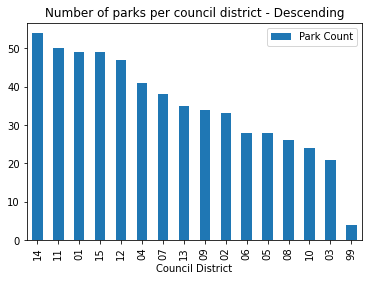

In [13]:
# make a bar graph that shows the number of parks in each council district
cd_count.plot.bar(x = 'Council District', y = 'Park Count', title = 'Number of parks per council district - Descending')

This is helpful to see that Council Districts generally have about 25-55 parks per district.

In [14]:
# query the data to look for parks in CD10 (formerly Mark Ridley-Thomas' district)
parks[parks.cd_real == '10']

,name,shape_area,objectid,park_id,name_alpha,shape_leng,area_acres,issubpark,region,address,name_publi,park_class,cd_real,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,ROBERT F KENNEDY PARK (LAUSD) JUA,641.47054538,0.149251627315,N,M,"3400 W Wilshire Blvd, LA 90010",Kennedy (Robert F) Inspiration Memorial Park (...,N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
3,Country Club Heritage Park,3647.84860118,4,1045,COUNTRY CLUB PARK HERITAGE PLAZA,287.523337381,0.0837434158085,N,M,"1015 S Wilton Pl, LA 90018",AKA Wilton Place Park,N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
37,Baldwin Hills Recreation Center,473404.601483,35,167,BALDWIN HILLS RECREATION CENTER,3237.80294196,10.8679177022,N,W,"5401 W Highlight Pl, LA 90016",None,C,10,"MULTIPOLYGON (((-118.36298 34.02483, -118.3630..."
67,Claude Pepper Senior Citizen Center,17319.4298971,65,255,CLAUDE PEPPER SENIOR CITIZEN CENTER,530.940568102,0.397600991163,N,W,"1762 S La Cienega Blvd, LA 90035",Pepper (Claude) Senior Citizen Center,C,10,"MULTIPOLYGON (((-118.37615 34.04508, -118.3761..."
121,Genesee Avenue Park,32709.9388508,108,250,GENESEE AVENUE PARK,742.13760875,0.750919873529,N,W,"2330 S Genesee Ave, LA 90019",None,N,10,"MULTIPOLYGON (((-118.36803 34.03703, -118.3682..."
146,Jim Gilliam Recreation Center,767749.422256,134,251,JIM GILLIAM RECREATION CENTER,5911.90246865,17.6251720216,N,W,"4000 S La Brea Ave, LA 90008","Gilliam (Jim) Childcare, Recreation Center",C,10,"MULTIPOLYGON (((-118.35482 34.01488, -118.3548..."
166,Leimert Plaza,49821.2806343,150,376,LEIMERT PLAZA,973.463841124,1.14374379982,N,W,"4395 S Leimert Blvd, LA 90008",Leimert Plaza Park,N,10,"MULTIPOLYGON (((-118.33100 34.00375, -118.3318..."
187,Mascot Park,8299.55801073,169,253,MASCOT TRIANGLE,522.233285416,0.190532396902,N,M,"Intersection of Mascot St & Pickford St, LA 90019","Mascot Park, Mascot Triangle Park",N,10,"MULTIPOLYGON (((-118.34143 34.04090, -118.3420..."
189,Queen Anne Recreation Center,227896.041733,203,257,QUEEN ANNE RECREATION CENTER,2227.88751234,5.23179415334,N,M,"1240 S West Blvd, 90019",None,C,10,"MULTIPOLYGON (((-118.33221 34.04974, -118.3322..."
201,Rancho Cienega Sports Complex,1261848.86589,205,258,RANCHO CIENEGA SPORTS COMPLEX,4530.09154351,28.9681798278,N,W,"5001 W Obama Blvd, LA 90016","Rancho Cienega Sports Center, Rancho Cienega R...",C,10,"MULTIPOLYGON (((-118.34938 34.02407, -118.3493..."


As a part of my capstone project, I'm particularly interested in Lafayette Park which is in this council district. I can see in comparison to other parks in the same council district, Lafayette is relatively big (~10 acres). Many parks in this council district seem to be smaller or pocket parks, perhaps suggesting that this council district is underserved in terms of park provisions. Using the bart graph above, I can also see that it's almost at the bottom of the list in terms of number of parks.